In [ ]:
import numpy as np
import matplotlib.pyplot as plt

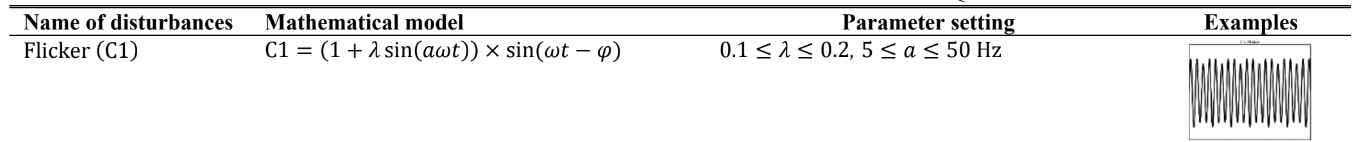

In [ ]:
def generate_flicker(duration=1, sample_rate=150):
    '''
    0.1<= lb <= 0.2
    5 <= alpha <= 50 Hz
    '''
    lb = np.random.uniform(0.1, 0.2)
    alpha = np.random.uniform(5, 50)
    t = np.linspace(0, duration, sample_rate)

    # Angular frequency: generate a random base frequency between 1 and 1000 rad/s
    omega = np.random.uniform(1, 1000)

    # Phase shift: random phase between 0 and 2pi
    phi = np.random.uniform(0, 2 * np.pi)

    x = alpha * omega * t
    y = omega * t - phi
    c = (1 + lb * np.sin(x)) * np.sin(y)

    return t, c

In [ ]:
def display_signals(arr):
    # take random flickers and display them in 5 x 1 subplots
    fig, axs = plt.subplots(5, 1, figsize=(10, 15))
    for i in range(5):
        t, c = arr[np.random.randint(0, len(arr))]
        axs[i].plot(t, c)

In [ ]:
flickers = []

for _ in range(200):
    t, c = generate_flicker()
    flickers.append((t, c))

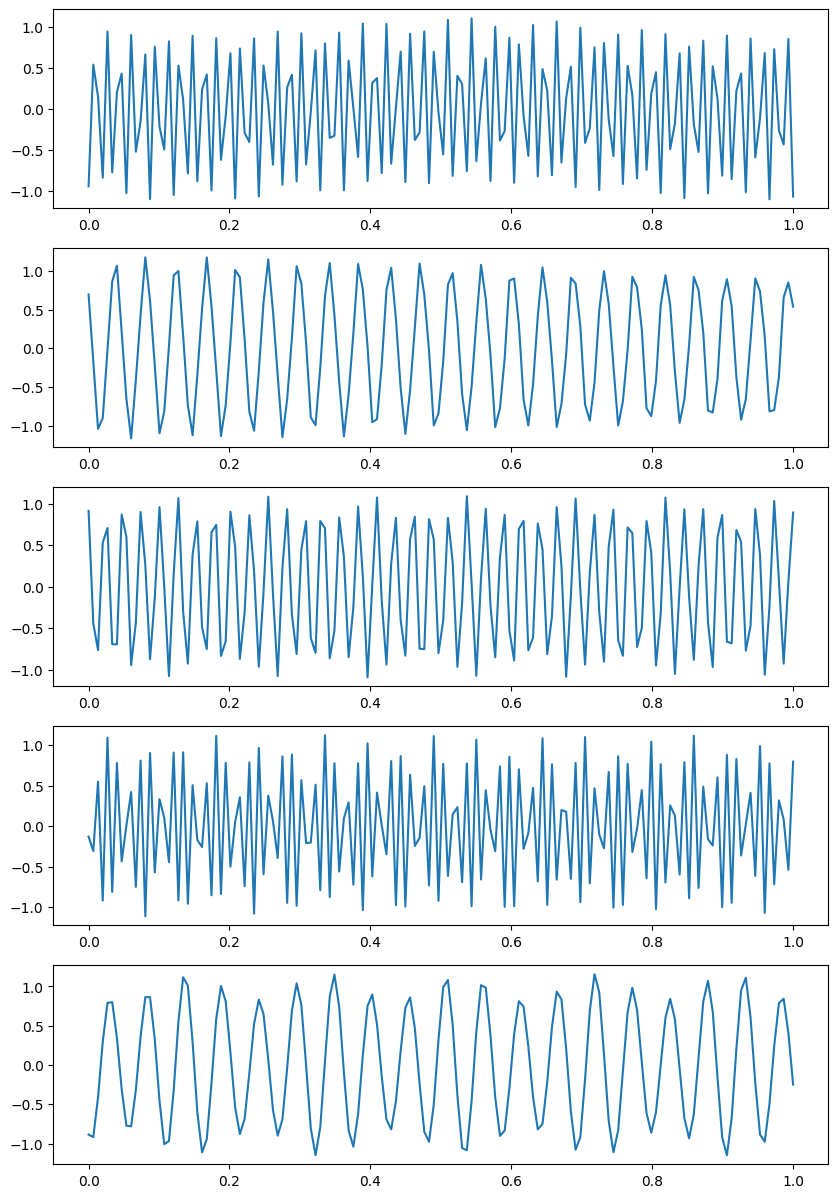

In [ ]:
display_signals(flickers)

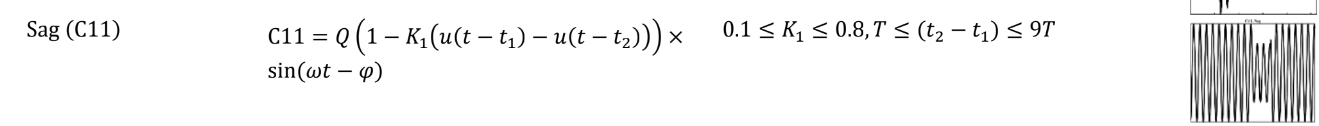

In [ ]:
def generate_sag(Q=1, T=0.02, duration=1, sample_rate=150):
    '''
    0.1 <= K1 <= 0.8
    T <= t2-t1 <= 9T
    '''
    t = np.linspace(0, duration, sample_rate)

    # Randomly generate K1 between 0.1 and 0.8
    K1 = np.random.uniform(0.1, 0.8)

    omega = np.random.uniform(1, 1000)

    phi = np.random.uniform(0, 2 * np.pi)

    # Set time values t1 and t2 such that T ≤ (t2 - t1) ≤ 9T
    t1 = np.random.uniform(0, duration - 9 * T)
    t2 = np.random.uniform(t1 + T, t1 + 9 * T)

    # Step functions u(t - t1) and u(t - t2) using Heaviside function
    step1 = np.heaviside(t - t1, 1)  # u(t - t1)
    step2 = np.heaviside(t - t2, 1)  # u(t - t2)

    # Modulation for sag
    mod_sag = 1 - K1 * (step1 - step2)

    # Compute the sagged signal C11
    C11 = Q * mod_sag * np.sin(omega * t - phi)

    return t, C11, K1, t1, t2

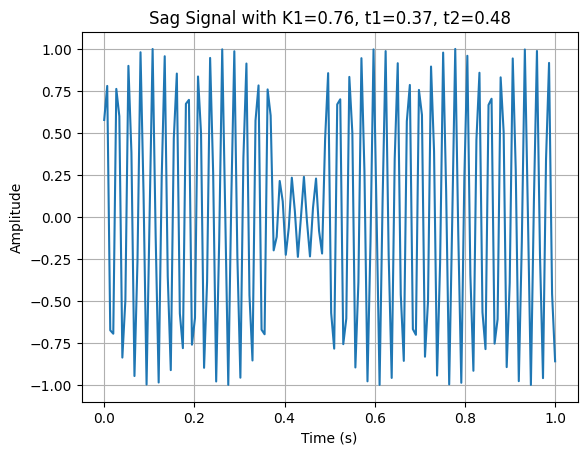

In [ ]:
t, sag_signal, K1_value, t1_value, t2_value = generate_sag()

plt.plot(t, sag_signal)
plt.title(f'Sag Signal with K1={K1_value:.2f}, t1={t1_value:.2f}, t2={t2_value:.2f}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
def generate_swell(Q=1, T=0.02, duration=1, sample_rate=150):
    # Time variable: create an evenly spaced array for time (e.g., 0 to duration seconds)
    t = np.linspace(0, duration, sample_rate)

    # Randomly generate K2 between 0.1 and 0.8
    K2 = np.random.uniform(0.1, 0.8)

    # Base angular frequency: generate a random base frequency
    omega = np.random.uniform(1, 1000)

    # Phase shift: random phase between 0 and 2π
    phi = np.random.uniform(0, 2 * np.pi)

    # Set time values t1 and t2 such that T ≤ (t2 - t1) ≤ 9T
    t1 = np.random.uniform(0, duration - 9 * T)
    t2 = np.random.uniform(t1 + T, t1 + 9 * T)

    # Step functions u(t - t1) and u(t - t2) using Heaviside function
    step1 = np.heaviside(t - t1, 1)  # u(t - t1)
    step2 = np.heaviside(t - t2, 1)  # u(t - t2)

    # Modulation for swell
    mod_swell = 1 + K2 * (step1 - step2)

    # Compute the swelled signal C14
    C14 = Q * mod_swell * np.sin(omega * t - phi)

    return t, C14, K2, t1, t2

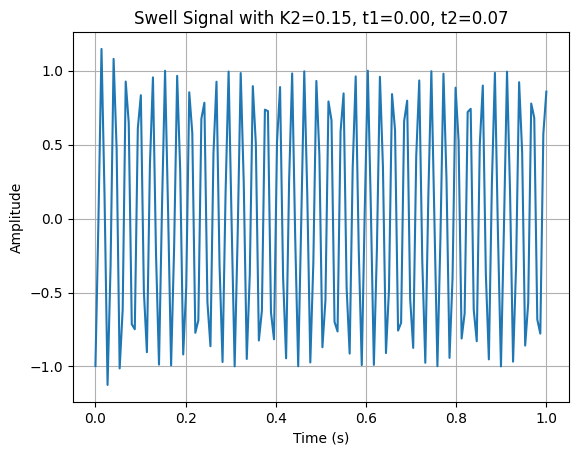

In [ ]:
t, swell_signal, K2_value, t1_value, t2_value = generate_swell()

plt.plot(t, swell_signal)
plt.title(f'Swell Signal with K2={K2_value:.2f}, t1={t1_value:.2f}, t2={t2_value:.2f}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
# converting to 2d signal
# from scipy.signal import stft

In [ ]:
# f, s, Zxx = stft(swell_signal, fs=150)

In [ ]:
# Zxx[0].shape

In [ ]:
# plt.imshow(np.abs(Zxx))
# plt.tight_layout()

In [ ]:
# from scipy.signal import ShortTimeFFT

In [ ]:
# ShortTimeFFT??

Object `ShortTimeFFT` not found.


In [ ]:
# def stft(signal, window_size, hop_length):
#     n_frames = 1 + (len(signal) - window_size) // hop_length
#     stft_matrix = np.empty((window_size // 2 + 1, n_frames), dtype=complex)

#     for i in range(n_frames):
#         frame = signal[i * hop_length: i * hop_length + window_size]
#         windowed_frame = frame * np.hamming(window_size)
#         stft_matrix[:, i] = np.fft.rfft(windowed_frame)

#     return stft_matrix

# window_size = 10
# hop_length = 5
# stft_matrix = stft(swell_signal, window_size, hop_length)

In [ ]:
# import librosa
# def plot_spectrogram(stft_matrix, sample_rate, hop_length):
#     magnitude_spectrogram = np.abs(stft_matrix)
#     log_spectrogram = librosa.amplitude_to_db(magnitude_spectrogram)

#     plt.figure()
#     librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length, x_axis="time", y_axis="linear")
#     plt.colorbar(format="%+2.0f dB")
#     plt.title("Spectrogram")
#     plt.show()

# plot_spectrogram(stft_matrix, 150, hop_length)

Synchrosqueezed Wavelet transform on signals

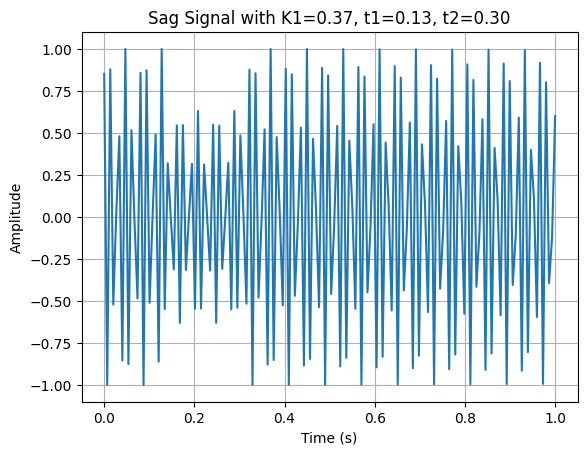

In [ ]:
# sample sag
t, sag_signal, K1_value, t1_value, t2_value = generate_sag()

plt.plot(t, sag_signal)
plt.title(f'Sag Signal with K1={K1_value:.2f}, t1={t1_value:.2f}, t2={t2_value:.2f}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
ssq_cwt??

In [ ]:
from ssqueezepy import ssq_cwt
Tx, Wx, ssq_freqs, scales = ssq_cwt(sag_signal, fs=150, wavelet='morlet')

In [ ]:
# scales

In [ ]:
from ssqueezepy import cwt

/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1454: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z.max())
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1455: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z.min())
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


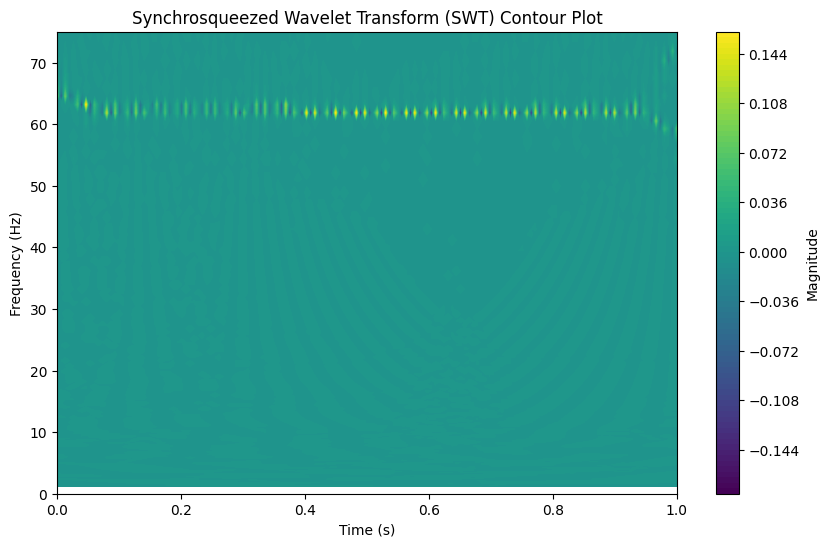

In [ ]:
plt.figure(figsize=(10, 6))

plt.contourf(t, ssq_freqs, Tx, levels=100, cmap='viridis')

plt.title('Synchrosqueezed Wavelet Transform (SWT) Contour Plot')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.ylim(0, 150/2)  # Nyquist frequency
plt.show()

In [ ]:
t = np.linspace(0, 1, 150)
xt1 = np.sin(2*np.pi*5*t)
xt2 = np.sin(2*np.pi*10*t)
xt3 = np.sin(2*np.pi*15*t)
xt4 = np.sin(2*np.pi*20*t)

xt=xt1+xt2+xt3+xt4

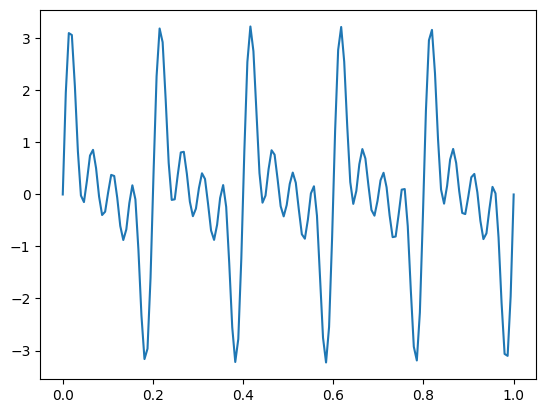

In [ ]:
plt.plot(t, xt)

In [ ]:
Tx, Wx, ssq_freqs, scales = ssq_cwt(xt, fs=150, wavelet='morlet')

/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1454: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = float(z.max())
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1455: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = float(z.min())
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


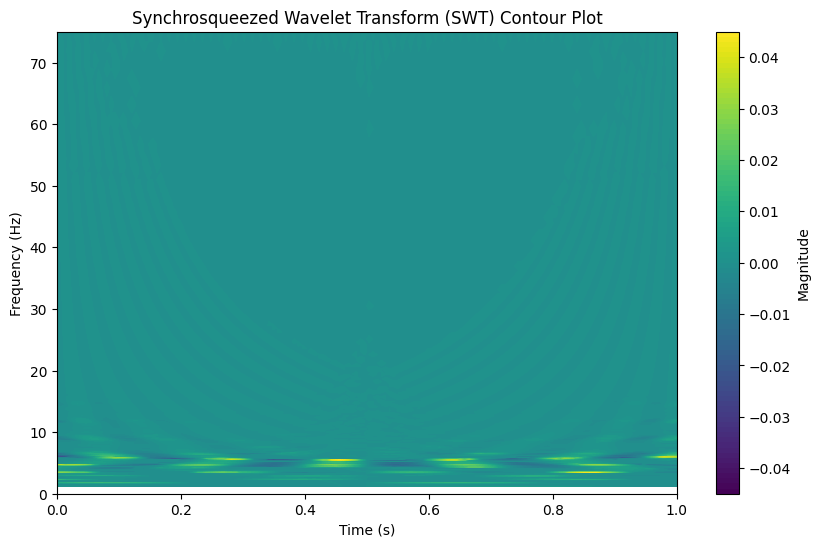

In [ ]:
plt.figure(figsize=(10, 6))

plt.contourf(t, ssq_freqs, Tx, levels=100, cmap='viridis')

plt.title('Synchrosqueezed Wavelet Transform (SWT) Contour Plot')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Magnitude')
plt.ylim(0, 150/2)  # Nyquist frequency
plt.show()